In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [62]:
data = pd.read_csv('preprocessed.csv',
                       encoding='utf-8', names=['text', 'class'], skiprows =1)

In [63]:
data['text'] = data['text'].str.lower()

In [64]:
data

,text,class
0,information sci-news.com collect online sci-ne...,First Party Collection/Use
1,#name?,First Party Collection/Use
2,use cooky sci-news.com us cookie technology. c...,First Party Collection/Use
3,"course visit sci-news.com website, page see, a...",First Party Collection/Use
4,please note visit sci-news.com website notice ...,Third Party Sharing/Collection
...,...,...
2634,information collected online information colle...,First Party Collection/Use
2635,information collected online information colle...,Third Party Sharing/Collection
2636,information collected mohegan sun addition inf...,First Party Collection/Use
2637,information collected mohegan sun addition inf...,Third Party Sharing/Collection


In [65]:
dict = {}

def find_all_classes(text):
    try:
        dict[text]
    except:
        dict[text] = len(dict)
           
#data['class'].apply(find_all_classes)

dict

{'First Party Collection/Use': 0,
 'Third Party Sharing/Collection': 1,
 'User Choice/Control': 2,
 'Privacy contact information': 3,
 'Introductory/Generic': 4,
 'Practice not covered': 5,
 'Data Security': 6,
 'User Access, Edit and Deletion': 7,
 'Policy Change': 8,
 'Do Not Track': 9,
 'International and Specific Audiences': 10,
 'Data Retention': 11}

In [66]:
def replace_classes_with_numbers(text):
    return dict[text]

data['class'] =data['class'].apply(replace_classes_with_numbers)

data

,text,class
0,information sci-news.com collect online sci-ne...,0
1,#name?,0
2,use cooky sci-news.com us cookie technology. c...,0
3,"course visit sci-news.com website, page see, a...",0
4,please note visit sci-news.com website notice ...,1
...,...,...
2634,information collected online information colle...,0
2635,information collected online information colle...,1
2636,information collected mohegan sun addition inf...,0
2637,information collected mohegan sun addition inf...,1


In [35]:
stop_words = stopwords.words('english')
stop_words.append('may') #???
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(data['text'])

0       information sci-news.com collect online sci-ne...
1                                                  #name?
2       use cookies sci-news.com uses cookie technolog...
3       course visit sci-news.com website, pages see, ...
4       please note visits sci-news.com website notice...
                              ...                        
2634    information collected online information colle...
2635    information collected online information colle...
2636    information collected mohegan sun addition inf...
2637    information collected mohegan sun addition inf...
2638    special note children site intended children. ...
Name: text, Length: 2639, dtype: object


In [43]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

data['text'] = data['text'].apply(lemmatize_text)

In [67]:
#data.to_csv('preprocessed.csv')

0     781
1     584
4     240
2     233
10    204
6     139
3     129
7     101
5      83
8      73
11     50
9      22
Name: class, dtype: int64


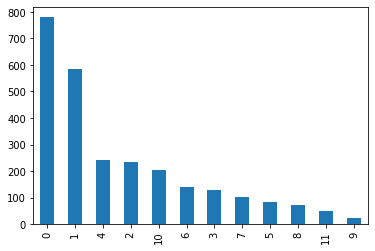

In [81]:
print(data['class'].value_counts())
data['class'].value_counts().plot(kind='bar')